# Project: Wrangling and Analyze Data

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import dependencies
import pandas as pd
import numpy as np

In [2]:
# read in the dataset
twit_arcive= pd.read_csv('twitter-archive-enhanced.csv')
twit_arcive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1738,679527802031484928,NaN,NaN,2015-12-23 05:03:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper just arrived. 11/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679527802...,11,10,None,None,None,pupper,None
764,777953400541634568,NaN,NaN,2016-09-19 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Gerald. He's a fairly exot...,7.681934e+17,4.196984e+09,2016-08-23 21:09:14 +0000,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,None,None,None
983,749395845976588288,NaN,NaN,2016-07-03 00:14:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He just remembered that bees a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749395845...,10,10,George,None,None,None,None
1932,674024893172875264,NaN,NaN,2015-12-08 00:37:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you realize it doesn't matter how hard yo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674024893...,10,10,None,None,None,None,None
2192,668932921458302977,NaN,NaN,2015-11-23 23:23:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herald. He likes to swing. Subtle tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668932921...,9,10,Herald,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Add requests library
import requests

# get the url
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#download tweet image prediction using Request library
response= requests.get(url)
file_name= 'image_predictions.tsv'
with open (file_name, mode= 'wb') as file:
    file.write(response.content)
    
#Open tsv file
image_predictions= pd.read_csv('image_predictions.tsv', sep= '\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy

consumer_key = 'XXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXX-XXXXXXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
# a simple check to test api connection
api.get_status(892177421306343426).favorite_count

In [7]:
# # defined dictionaries to hold key:value pairs of tweet_id and retweet count and tweet_id 
# #     and favourite count

failed_ids={} # to hold failed ids and exceptions
count= 0
list_of_counts_dict= [] # Dictionary to hold observation of tweet_ids retweet and favourite counts

# # using a loop to try-except-else to test api connection, show error, or else fill 
# #     the corresponding dictionary with required retweet and favourite, count values.
for item in twitter_achive_enchanced['tweet_id']:
     try:
         api.get_status(item)
     except Exception as e:
         failed_ids[item]= e
         print(count, ": failed")
         count+= 1
     else:
         print(count, ': Successful')
         list_of_counts_dict.append({'tweet_id': item, 
                                     'retweet_count': api.get_status(item).retweet_count, 
                                     'favourite_count': api.get_status(item).favorite_count})

In [8]:
 retry2_failed= {}
 retry2_count= 0
 list_retry1_failed= list(failed_ids.keys())

 for item in list_retry1_failed:
     try:
         api.get_status(item)
     except Exception as e:
         retry2_failed[item]= e
         print(retry2_count, ": failed")
         retry2_count+= 1
     else:
         print(count, ': Successful')
         list_of_counts_dict.append({'tweet_id': item, 
                                     'retweet_count': api.get_status(item).retweet_count, 
                                     'favourite_count': api.get_status(item).favorite_count})

#### After retrying, the following 29 still returned errors, below are the errors
>retry2_failed


    {888202515573088257: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     873697596434513921: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     872668790621863937: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     872261713294495745: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     869988702071779329: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     866816280283807744: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     861769973181624320: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     856602993587888130: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     856330835276025856: tweepy.errors.NotFound('404 Not Found\n34 - Sorry, that page does not exist.'),
     851953902622658560: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     851861385021730816: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     845459076796616705: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     844704788403113984: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     842892208864923648: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     837366284874571778: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     837012587749474308: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     829374341691346946: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     827228250799742977: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     812747805718642688: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     802247111496568832: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     779123168116150273: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     775096608509886464: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     771004394259247104: tweepy.errors.Forbidden('403 Forbidden\n179 - Sorry, you are not authorized to see this status.'),
     770743923962707968: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     766864461642756096: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     759923798737051648: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     759566828574212096: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     754011816964026368: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
     680055455951884288: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.')}

In [9]:
 rt_fav_count_df= pd.DataFrame(list_of_counts_dict)
 rt_fav_count_df.head()

In [10]:
# # check to see if number of missing tweets plus number of found tweets equals number of 
# #     tweets_ids in twitter_achive_enchanced
 len(rt_fav_count_failed.tweet_id) + len(retry2_failed) ==len(twitter_achive_enchanced.tweet_id)

## Assessing Data
I detected and documented **nine (9) quality issues and two (2) tidiness issue** by using **both** visual assessment and programmatic assessement to assess the data.

In [11]:
rt_fav_count = pd.read_csv('rt_fav_count_from_twitter_api.csv')

In [12]:
rt_fav_count.drop('Unnamed: 0', axis=1, inplace=True)

#### Visual Assessment

In [13]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
rt_fav_count.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,7012,33832
1,892177421306343426,5302,29347
2,891815181378084864,3483,22069
3,891689557279858688,7229,36959
4,891327558926688256,7768,35332


In [15]:
twit_arcive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Programmatic Assessment

In [16]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
rt_fav_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2327 non-null   int64
 1   retweet_count    2327 non-null   int64
 2   favourite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [18]:
twit_arcive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
twit_arcive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
# checking unique values in df
def check_unique(df):
    for i in df.columns:
        print(i,':', df[i].nunique(),'\n')

In [21]:
check_unique(image_predictions)

tweet_id : 2075 

jpg_url : 2009 

img_num : 4 

p1 : 378 

p1_conf : 2006 

p1_dog : 2 

p2 : 405 

p2_conf : 2004 

p2_dog : 2 

p3 : 408 

p3_conf : 2006 

p3_dog : 2 



In [22]:
check_unique(rt_fav_count)

tweet_id : 2327 

retweet_count : 1658 

favourite_count : 1975 



In [23]:
check_unique(twit_arcive)

tweet_id : 2356 

in_reply_to_status_id : 77 

in_reply_to_user_id : 31 

timestamp : 2356 

source : 4 

text : 2356 

retweeted_status_id : 181 

retweeted_status_user_id : 25 

retweeted_status_timestamp : 181 

expanded_urls : 2218 

rating_numerator : 40 

rating_denominator : 18 

name : 957 

doggo : 2 

floofer : 2 

pupper : 2 

puppo : 2 



In [24]:
twit_arcive[twit_arcive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [25]:
rt_fav_count[rt_fav_count.duplicated()]

,tweet_id,retweet_count,favourite_count


In [26]:
image_predictions[image_predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [27]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
twit_arcive.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2356.0,7.427716e+17,6.856705e+16,6.660209e+17,6.783989e+17,7.196279e+17,7.993373e+17,8.924206e+17
in_reply_to_status_id,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
retweeted_status_id,181.0,7.720400e+17,6.236928e+16,6.661041e+17,7.186315e+17,7.804657e+17,8.203146e+17,8.874740e+17
retweeted_status_user_id,181.0,1.241698e+16,9.599254e+16,7.832140e+05,4.196984e+09,4.196984e+09,4.196984e+09,7.874618e+17
rating_numerator,2356.0,1.312649e+01,4.587665e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2356.0,1.045543e+01,6.745237e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02


### Quality issues
1. In the enhanced Twitter archive, denominator column has values other than 10.

2. In the enhanced Twitter archive, timestamp is an object.

3. In the enhanced Twitter archive, retweet status timestamp is an object.

4. There exist observations of retweets which should not exist in the data set.

5. In the twitter archive data, the source column contains html anchor tags and html class.

6. In the image prediction data, Non Descriptive column names.

7. Twit archive df, datetime column has dates which postdates Aug 1, 2017

8. Drop columns that serve no purpose in our analysis.

9. Dog names in the image prediction data have case issues, upper and lower for the same name.

### Tidiness issues
1. In the enhanced Twitter archive, multiple columns used to represent one variable

2. There no need for the multiple tables as they all contain disparate information about the same observational unit.

## Cleaning Data
In this section, I made a copy of the original data then cleaned **all** of the issues documented while assessing. 

In [132]:
# Make copies of original pieces of data
tweet_archive= twit_arcive.copy()
image_df= image_predictions.copy()
retweet_favorite_df= rt_fav_count.copy()

### Issue #1: In the enhanced Twitter archive, denominator column has values other than 10

#### Define
Assign the values of the rating_denominator as 10

#### Code

In [133]:
tweet_archive['rating_denominator']= 10

#### Test

In [134]:
tweet_archive['rating_denominator'].unique()

array([10])

In [135]:
tweet_archive.rating_denominator.dtype

dtype('int64')

### Issue #2:

Convert timestamp and retweet_status_timestamp columns in the tweet_archive df to datetime formats

#### Define

Use the pd.to_datetime function to convert to datetime for the 2 columns

#### Code

In [136]:
tweet_archive['timestamp'] = pd.to_datetime(tweet_archive['timestamp'])

In [137]:
tweet_archive['retweeted_status_timestamp'] = pd.to_datetime(tweet_archive['retweeted_status_timestamp'])

#### Test

In [138]:
tweet_archive['timestamp'].dtype

datetime64[ns, UTC]

In [139]:
tweet_archive['retweeted_status_timestamp'].dtype

datetime64[ns, UTC]

### Issue #3: In the enhanced Twitter archive, retweet status timestamp is an object.

#### Define

- The null values provides insights to retweets in our dataframe which should be removed.
- To remove the retweets I would mask the dataframe with the non-null column of the retweet columns to get all ids which are retweet
- After getting the list of all ids of all retweet columns, I will remove retweets

#### Code

In [140]:
list_of_retweet_id= list(tweet_archive.retweeted_status_id.unique()) # creates a list of retweet_id
a=list_of_retweet_id[0] # creating the NaN variable to be removed from the list
list_of_retweet_id.remove(a) # removes the NaN element
list_of_retweet_id[:5] # to show the first five elements of the list

[8.874739571039519e+17,
 8.860537344211026e+17,
 8.305833205850685e+17,
 8.780576130401157e+17,
 8.782815110064783e+17]

In [141]:
# to remove rows containing retweets
for ids in list_of_retweet_id:
    tweet_archive.drop(tweet_archive.index[tweet_archive['retweeted_status_id']== ids])

In [142]:
# to drop columns containing retweet data
retweet_col= ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
tweet_archive.drop(retweet_col, axis=1, inplace=True)

#### Test

In [143]:
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue 5: In the twitter archive data, the source column contains html anchor tags and html class

#### Define
Reassign a slice of a the string to get rid of unwanted html tags and class

#### Code

In [144]:
tweet_archive.source= tweet_archive.source.str[len('<a href="'):-(len('" rel="nofollow">Twitter for iPhone</a>'))]

#### Test

In [145]:
tweet_archive['source']

0       http://twitter.com/download/iphone
1       http://twitter.com/download/iphone
2       http://twitter.com/download/iphone
3       http://twitter.com/download/iphone
4       http://twitter.com/download/iphone
                       ...                
2351    http://twitter.com/download/iphone
2352    http://twitter.com/download/iphone
2353    http://twitter.com/download/iphone
2354    http://twitter.com/download/iphone
2355    http://twitter.com/download/iphone
Name: source, Length: 2356, dtype: object

### Issue 6: In the image prediction data, there are non-descriptive column names

#### Define
- Create a dictionary to map undescriptive column names to descriptive column names
- Reassign the df.columns attribute to the new column names

#### Code

In [148]:
name_dict= {'jpg_url': 'image_url', 
            'img_num': 'image_number', 
            'p1':'prediction_1', 
            'p1_conf': 'prediction_1_confidence', 
            'p1_dog': 'prediction_1_is_dog', 
            'p2': 'prediction_2', 
            'p2_conf': 'prediction_2_confidence', 
            'p2_dog': 'prediction_2_is_dog', 
            'p3': 'prediction_3', 
            'p3_conf': 'prediction_3_confidence', 
            'p3_dog': 'prediction_3_is_dog'}

In [149]:
image_df.rename(columns=name_dict, inplace=True)

#### Test

In [150]:
image_df.head(1)

,tweet_id,image_url,image_number,prediction_1,prediction_1_confidence,prediction_1_is_dog,prediction_2,prediction_2_confidence,prediction_2_is_dog,prediction_3,prediction_3_confidence,prediction_3_is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Issue 7: Twit archive df, datetime column has dates which postdates Aug 1, 2017

#### Define
Use the df.drop method to drop dates after Aug 1st 2017

#### Code

In [151]:
outbound_dates_ids= tweet_archive[tweet_archive['timestamp'] > '2017-07-31']['tweet_id'].to_list()

In [152]:
outbound_dates_ids

[892420643555336193, 892177421306343426, 891815181378084864]

In [153]:
for ids in outbound_dates_ids:
    tweet_archive.drop(tweet_archive.index[tweet_archive['tweet_id']== ids], inplace=True)

#### Test

In [155]:
tweet_archive[tweet_archive['timestamp'] > '2017-07-31']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issues 8: Drop columns that serve no purpose in our analysis

#### Define
- Use a df.drop method to drop irrelevant columns

#### Code

In [156]:
tweet_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source',], axis=1, inplace=True)

#### Test

In [157]:
tweet_archive.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None


### Issue 9: Dog names in the prediction data have case issues, upper and lower case for the same name.

#### Define
- create a list to house column names of affected columns
- use a `.str().lower()` method on affected columns

#### Code

In [158]:
image_df['prediction_1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [160]:
case_list= ['prediction_1', 'prediction_2', 'prediction_3']
for i in case_list:
    image_df[i]= image_df[i].str.lower()

#### Test

In [161]:
image_df['prediction_1'].unique()

array(['welsh_springer_spaniel', 'redbone', 'german_shepherd',
       'rhodesian_ridgeback', 'miniature_pinscher',
       'bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'gordon_setter',
       'walker_hound', 'pug', 'bloodhound', 'lhasa', 'english_setter',
       'hen', 'desktop_computer', 'italian_greyhound', 'maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'blenheim_spaniel', 'pembroke', 'llama',
       'chesapeake_bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'ibizan_hound', 'border_collie', 'labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'west_highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'rottweiler',
       'siberian_husky', 't

### Issue 10: In the enhanced Twitter archive, multiple columns used to represent one variable

#### Define
- Create a `for loop` to change None to an empty string
- Create a new column `dog_stage` by concatenating the the dog stage columns
- Drop the dog stage columns

#### Code

In [162]:
none_columns= ['doggo', 'floofer', 'pupper', 'puppo']

for i in none_columns:
    for j in tweet_archive.index:
        if tweet_archive[i][j] == 'None':
            tweet_archive[i][j] = ''

/var/folders/xk/yng4j7rx54ng38j5cbdsvxt40000gn/T/ipykernel_5179/1683650204.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_archive[i][j] = ''


In [164]:
tweet_archive['dog_stage']= tweet_archive.doggo + tweet_archive.floofer + tweet_archive.pupper + tweet_archive.puppo

In [165]:
tweet_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [166]:
tweet_archive.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

### Issue 11: There no need for the multiple tables as they all contain disparate information about thesame observational unit.

#### Define
- Merge all three datasets with *tweet_id* using the `pd.merge` function

#### Code

In [167]:
twitter_archive_master=[]

In [168]:
twitter_archive_master= pd.merge(tweet_archive, image_df, on='tweet_id')

In [169]:
twitter_archive_master= pd.merge(twitter_archive_master, retweet_favorite_df, on='tweet_id')

#### Test

In [170]:
twitter_archive_master.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,image_url,image_number,...,prediction_1_confidence,prediction_1_is_dog,prediction_2,prediction_2_confidence,prediction_2_is_dog,prediction_3,prediction_3_confidence,prediction_3_is_dog,retweet_count,favourite_count
0,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7229,36959
1,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,7768,35332
2,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,2602,17820
3,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,1667,10372
4,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,15766,56898


## Storing Data
The gathered, assessed, and cleaned master dataset is saved to a CSV file named "twitter_archive_master.csv".

In [171]:
twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
The wrangled data is analyzed and visualized to produce **four (4) insights and one (1) visualisation.**

In [212]:
# Assigned the twitter_archive_master to df
df= twitter_archive_master.copy()

In [200]:
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,image_url,image_number,...,prediction_1_confidence,prediction_1_is_dog,prediction_2,prediction_2_confidence,prediction_2_is_dog,prediction_3,prediction_3_confidence,prediction_3_is_dog,retweet_count,favourite_count
0,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7229,36959
1,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,7768,35332
2,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,2602,17820
3,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,1667,10372
4,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,15766,56898


### Insights:
**Questions to answer**
1. What is the most common dog names in the rated dogs?
2. Which of the dog stages has the highest retweets?
3. Which of the dog stages has the highest favorites?
4. What are the top 20 best rated dog breeds in #weratedogs archive?

#### Analysis 1: What is the most common dog name amongst the rated dogs

In [203]:
# import dependencies
import seaborn as sns
import matplotlib.pyplot as plt

In [214]:
# Using a value_counts method to group dog names by count
pd.DataFrame(df[['name']].value_counts(), columns= ['count']).reset_index().head(20)

,name,count
0,None,571
1,a,55
2,Charlie,10
3,Oliver,10
4,Tucker,10
5,Penny,10
6,Cooper,10
7,Lucy,9
8,Bo,8
9,Winston,8


##### The  most common dog names
> Based on the findings the most common dog names in the #weratedogs archive are **Charlie, Oliver, Tucker, Penny, Cooper, Lucy, Bo, Winston, Lola and Sadie**.

#### Analysis 2: Which of the dog stages has the highest favourites?

In [207]:
#Use groupby to group dog stages, summed by favourite_count and sorted using sort_values
df.groupby(['dog_stage']).sum()[['favourite_count']].reset_index().sort_values('favourite_count', ascending=False)

,dog_stage,favourite_count
0,,12209438.0
6,pupper,1260481.0
1,doggo,1092047.0
7,puppo,430858.0
3,doggopupper,108409.0
5,floofer,78631.0
4,doggopuppo,41935.0
2,doggofloofer,14848.0


##### The dog stage with the highest favourites
 >Based on the findings, the dog stage with the highest favourites is **pupper**

#### Analysis 3: Which of the dog stages has the highest retweets?

In [208]:
#Use groupby to group dog stages, summed by retweet_count and sorted using sort_values
df.groupby(['dog_stage']).sum()[['retweet_count']].reset_index().sort_values('retweet_count', ascending=False)

,dog_stage,retweet_count
0,,3784853.0
1,doggo,427619.0
6,pupper,418618.0
7,puppo,121648.0
3,doggopupper,49497.0
5,floofer,27924.0
4,doggopuppo,16147.0
2,doggofloofer,2797.0


##### The dog stage with the highest retweets
 >Based on the findings, the dog stage with the highest favourites is **doggo**

#### Analysis 4: What are the top 20 best rated dog breeds in #weratedogs archive?

In [209]:
# Get rating by dividing the rating numerator by the rating denominator
df['rating']= df['rating_numerator']/df['rating_denominator']

In [210]:
#Use groupby to group dog breed names, using the mean of rating and sorted using sort_values
df[df['prediction_1_is_dog']== True].groupby(['prediction_1']).mean()[['rating']].reset_index().sort_values('rating', ascending=False).head(20)

,prediction_1,rating
28,clumber,2.700000
94,soft-coated_wheaten_terrier,2.545455
107,west_highland_white_terrier,1.564286
47,great_pyrenees,1.492857
16,borzoi,1.444444
60,labrador_retriever,1.386458
92,siberian_husky,1.325000
44,golden_retriever,1.310000
79,pomeranian,1.286842
85,saluki,1.250000


### Visualisation of best rated dog breeds

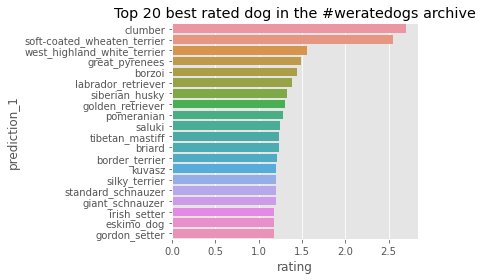

In [211]:
# top 20 best rated dog breeds
viz_df= df[df['prediction_1_is_dog']== True].groupby(['prediction_1']).mean()[['rating']].reset_index().sort_values('rating', ascending=False).head(20)
plt.style.use('ggplot')
fig, axes= plt.subplots()
sns.barplot(y= 'prediction_1', x= 'rating', data= viz_df)
plt.title('Top 20 best rated dog in the #weratedogs archive')
plt.tight_layout()


##### Top best rated dog breeds
 >Based on the findings, the best rated dog breeds are **clumber, terrier, great_pyrenees, borzoi, labrador_retriever, siberian husky and golden retriever (my favourite!).**